In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dtype_dict = {
    'id_mutation': 'str',
    'date_mutation': 'str',
    'numero_disposition': 'str',
    'nature_mutation': 'str',
    'valeur_fonciere': 'float64',
    'adresse_numero': 'float64',
    'adresse_suffixe': 'str',
    'adresse_nom_voie': 'str',
    'adresse_code_voie': 'str',
    'code_postal': 'str',
    'code_commune': 'str',
    'nom_commune': 'str',
    'code_departement': 'str',
    'ancien_code_commune': 'str',
    'ancien_nom_commune': 'str',
    'id_parcelle': 'str',
    'ancien_id_parcelle': 'str',
    'numero_volume': 'str',
    'lot1_numero': 'str',
    'lot1_surface_carrez': 'float64',
    'lot2_numero': 'str',
    'lot2_surface_carrez': 'float64',
    'lot3_numero': 'str',
    'lot3_surface_carrez': 'float64',
    'lot4_numero': 'str',
    'lot4_surface_carrez': 'float64',
    'lot5_numero': 'str',
    'lot5_surface_carrez': 'float64',
    'nombre_lots': 'int32',
    'code_type_local': 'str',
    'type_local': 'str',
    'surface_reelle_bati': 'float64',
    'nombre_pieces_principales': 'float64',
    'code_nature_culture': 'str',
    'nature_culture': 'str',
    'code_nature_culture_speciale': 'str',
    'nature_culture_speciale': 'str',
    'surface_terrain': 'float64',
    'longitude': 'float64',
    'latitude': 'float64'
}

In [3]:
data = pd.read_csv("data/full_2022.csv",dtype=dtype_dict)
data = data.dropna(subset=['longitude', 'latitude'])
data = data.drop_duplicates()


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4233650 entries, 0 to 4617589
Data columns (total 40 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id_mutation                   object 
 1   date_mutation                 object 
 2   numero_disposition            object 
 3   nature_mutation               object 
 4   valeur_fonciere               float64
 5   adresse_numero                float64
 6   adresse_suffixe               object 
 7   adresse_nom_voie              object 
 8   adresse_code_voie             object 
 9   code_postal                   object 
 10  code_commune                  object 
 11  nom_commune                   object 
 12  code_departement              object 
 13  ancien_code_commune           object 
 14  ancien_nom_commune            object 
 15  id_parcelle                   object 
 16  ancien_id_parcelle            object 
 17  numero_volume                 object 
 18  lot1_numero                

In [5]:
data["nature_mutation"].unique()

array(['Vente', "Vente en l'état futur d'achèvement", 'Echange',
       'Vente terrain à bâtir', 'Adjudication', 'Expropriation'],
      dtype=object)

In [6]:
sampled_data = data
sampled_data = sampled_data[sampled_data["nature_mutation"].isin(["Vente","Vente en l'état futur d'achèvement"])]
sampled_data = sampled_data[(sampled_data["nombre_lots"] == 0) | (sampled_data["nombre_lots"] == 1)]
sampled_data = sampled_data[(sampled_data['surface_reelle_bati'].notna()) & (sampled_data['surface_reelle_bati'] != 0)]
sampled_data = sampled_data[(sampled_data['valeur_fonciere'].notna()) & (sampled_data['valeur_fonciere'] != 0)]
sampled_data['code_departement'] = sampled_data['code_departement'].replace(['2A', '2B'], '02')


In [7]:
sampled_data = sampled_data.dropna(subset=['valeur_fonciere'])
columns_to_drop = ["lot1_numero", "lot2_numero", "lot3_numero", "lot4_numero", "lot5_numero","ancien_code_commune",
                   "ancien_nom_commune","adresse_numero","adresse_suffixe","id_parcelle","ancien_id_parcelle","code_type_local",
                   "numero_volume","code_nature_culture_speciale","nature_culture_speciale","code_nature_culture",
                   "code_nature_culture","numero_disposition","id_mutation","lot2_surface_carrez","lot3_surface_carrez","lot4_surface_carrez",
                   "lot5_surface_carrez","adresse_nom_voie","adresse_code_voie","code_postal","code_commune","nom_commune","nombre_lots",
                   "lot1_surface_carrez","nature_culture"]
    
sampled_data = sampled_data.drop(columns=columns_to_drop)

In [8]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1220352 entries, 0 to 4617578
Data columns (total 10 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1220352 non-null  object 
 1   nature_mutation            1220352 non-null  object 
 2   valeur_fonciere            1220352 non-null  float64
 3   code_departement           1220352 non-null  object 
 4   type_local                 1220352 non-null  object 
 5   surface_reelle_bati        1220352 non-null  float64
 6   nombre_pieces_principales  1220352 non-null  float64
 7   surface_terrain            871221 non-null   float64
 8   longitude                  1220352 non-null  float64
 9   latitude                   1220352 non-null  float64
dtypes: float64(6), object(4)
memory usage: 102.4+ MB


In [9]:
sampled_data['latitude'] = sampled_data['latitude'].astype(float)
sampled_data['longitude'] = sampled_data['longitude'].astype(float)


# Fill NA values with 0 for 'surface_terrain'
sampled_data["surface_terrain"] = sampled_data["surface_terrain"].fillna(0)

# Convert 'valeur_fonciere' to string, replace commas with periods, and then convert to float
sampled_data["valeur_fonciere"] = sampled_data["valeur_fonciere"].astype(str).apply(lambda x: x.replace(",", ".")).astype(float)

# Ensure that the conversion to integer happens after handling NaN or other non-numeric values
# sampled_data["valeur_fonciere"] = sampled_data["valeur_fonciere"].astype(int)

# Calculate 'Prix_m' and round it
sampled_data["Prix_m"] = sampled_data["valeur_fonciere"] / sampled_data["surface_reelle_bati"]
sampled_data["Prix_m"] = sampled_data["Prix_m"].apply(lambda x: round(x))

sampled_data['latitude_r'] = np.deg2rad(sampled_data['latitude'])
sampled_data['longitude_r'] = np.deg2rad(sampled_data['longitude'])
sampled_data=sampled_data[sampled_data.latitude.notna()]
sampled_data=sampled_data[sampled_data.code_departement.notna()]

sampled_data=sampled_data.sort_values(by = ['latitude','longitude'])
sampled_data=sampled_data.drop(columns=['latitude','longitude'])
sampled_data=sampled_data.reset_index(drop=True)


In [10]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220352 entries, 0 to 1220351
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1220352 non-null  object 
 1   nature_mutation            1220352 non-null  object 
 2   valeur_fonciere            1220352 non-null  float64
 3   code_departement           1220352 non-null  object 
 4   type_local                 1220352 non-null  object 
 5   surface_reelle_bati        1220352 non-null  float64
 6   nombre_pieces_principales  1220352 non-null  float64
 7   surface_terrain            1220352 non-null  float64
 8   Prix_m                     1220352 non-null  int64  
 9   latitude_r                 1220352 non-null  float64
 10  longitude_r                1220352 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 102.4+ MB


In [11]:
sampled_data = sampled_data[sampled_data['Prix_m'] <= 75000]

In [12]:
def filter_outliers(df):
    # Groupage par département
    grouped = df.groupby('code_departement')

    # Fonction pour filtrer les valeurs aberrantes dans chaque groupe
    def filter_group(group):
        Q1 = group['Prix_m'].quantile(0.25)
        Q3 = group['Prix_m'].quantile(0.75)
        IQR = Q3 - Q1
        return group[(group['Prix_m'] >= (Q1 - 1.5 * IQR)) & (group['Prix_m'] <= (Q3 + 1.5 * IQR))]

    # Application du filtre à chaque groupe et combinaison des résultats
    return grouped.apply(filter_group).reset_index(drop=True)

# Application de la fonction de filtrage
sampled_data = filter_outliers(sampled_data)


In [13]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087075 entries, 0 to 1087074
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1087075 non-null  object 
 1   nature_mutation            1087075 non-null  object 
 2   valeur_fonciere            1087075 non-null  float64
 3   code_departement           1087075 non-null  object 
 4   type_local                 1087075 non-null  object 
 5   surface_reelle_bati        1087075 non-null  float64
 6   nombre_pieces_principales  1087075 non-null  float64
 7   surface_terrain            1087075 non-null  float64
 8   Prix_m                     1087075 non-null  int64  
 9   latitude_r                 1087075 non-null  float64
 10  longitude_r                1087075 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 91.2+ MB


In [14]:
sampled_data.pivot_table(values='valeur_fonciere', index='type_local', columns='nature_mutation', aggfunc='size')

nature_mutation,Vente,Vente en l'état futur d'achèvement
type_local,,
Appartement,296693,7733
Local industriel. commercial ou assimilé,77906,686
Maison,703651,406


In [17]:
appart_old=sampled_data[(sampled_data['type_local']=='Appartement') & (sampled_data['nature_mutation']=='Vente') & (sampled_data['Prix_m']>500)]
appart_old.reset_index(drop=True,inplace=True)
maison_old=sampled_data[(sampled_data['type_local']=='Maison') & (sampled_data['nature_mutation']=='Vente')]
maison_old=maison_old[(maison_old['valeur_fonciere']>20000)&(maison_old['Prix_m']>500)&(maison_old['surface_reelle_bati']>9)]
maison_old.reset_index(drop=True,inplace=True)
#local_old =sampled_data[(sampled_data['type_local']=='Local industriel. commercial ou assimilé') & (sampled_data['nature_mutation']=='Vente')]
#local_old.reset_index(drop=True,inplace=True)
appart_new=sampled_data[(sampled_data['type_local']=='Appartement') & (sampled_data['nature_mutation']=='Vente en l\'état futur d\'achèvement')]
appart_new.reset_index(drop=True,inplace=True)

In [18]:
#local_old.info()

In [19]:
appart_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292372 entries, 0 to 292371
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_mutation              292372 non-null  object 
 1   nature_mutation            292372 non-null  object 
 2   valeur_fonciere            292372 non-null  float64
 3   code_departement           292372 non-null  object 
 4   type_local                 292372 non-null  object 
 5   surface_reelle_bati        292372 non-null  float64
 6   nombre_pieces_principales  292372 non-null  float64
 7   surface_terrain            292372 non-null  float64
 8   Prix_m                     292372 non-null  int64  
 9   latitude_r                 292372 non-null  float64
 10  longitude_r                292372 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 24.5+ MB


In [20]:
appart_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7733 entries, 0 to 7732
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_mutation              7733 non-null   object 
 1   nature_mutation            7733 non-null   object 
 2   valeur_fonciere            7733 non-null   float64
 3   code_departement           7733 non-null   object 
 4   type_local                 7733 non-null   object 
 5   surface_reelle_bati        7733 non-null   float64
 6   nombre_pieces_principales  7733 non-null   float64
 7   surface_terrain            7733 non-null   float64
 8   Prix_m                     7733 non-null   int64  
 9   latitude_r                 7733 non-null   float64
 10  longitude_r                7733 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 664.7+ KB


In [21]:
maison_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676402 entries, 0 to 676401
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_mutation              676402 non-null  object 
 1   nature_mutation            676402 non-null  object 
 2   valeur_fonciere            676402 non-null  float64
 3   code_departement           676402 non-null  object 
 4   type_local                 676402 non-null  object 
 5   surface_reelle_bati        676402 non-null  float64
 6   nombre_pieces_principales  676402 non-null  float64
 7   surface_terrain            676402 non-null  float64
 8   Prix_m                     676402 non-null  int64  
 9   latitude_r                 676402 non-null  float64
 10  longitude_r                676402 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 56.8+ MB


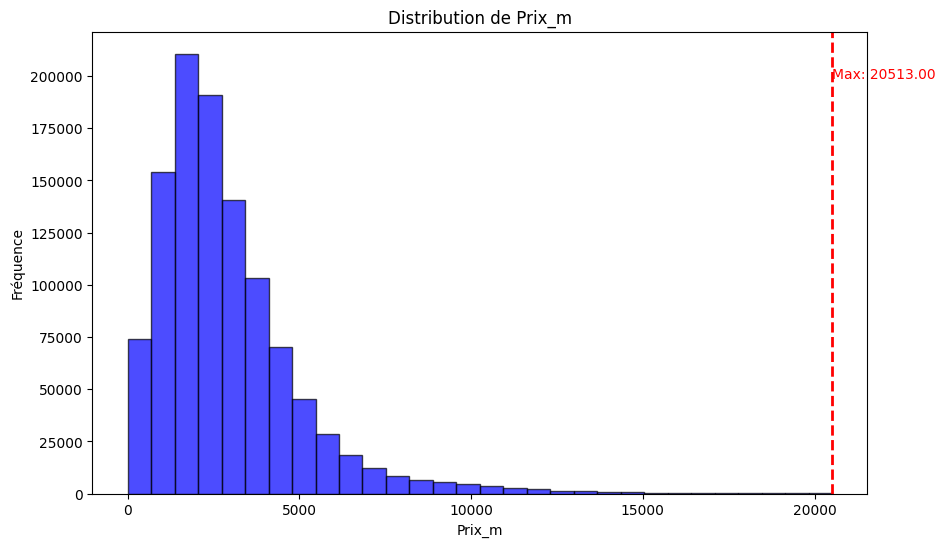

In [22]:
# Calcul de la valeur maximale
max_prix_m = sampled_data["Prix_m"].max()

# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(sampled_data["Prix_m"], bins=30, alpha=0.7, color='blue', edgecolor='black')

# Mettre en évidence la valeur maximale
plt.axvline(max_prix_m, color='red', linestyle='dashed', linewidth=2)
plt.text(max_prix_m, plt.ylim()[1]*0.9, f'Max: {max_prix_m:.2f}', color = 'red')

# Titre et étiquettes
plt.title('Distribution de Prix_m')
plt.xlabel('Prix_m')
plt.ylabel('Fréquence')

# Afficher le graphique
plt.show()

In [23]:
# Trier le DataFrame par 'Prix_m' en ordre décroissant et sélectionner les 10 premières lignes
top_10_prix_m = sampled_data.sort_values(by="Prix_m", ascending=False).head(700)

top_10_prix_m


,date_mutation,nature_mutation,valeur_fonciere,code_departement,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,Prix_m,latitude_r,longitude_r
805608,2022-07-12,Vente,800000.0,75,Appartement,39.0,2.0,0.0,20513,0.852357,0.040517
808067,2022-08-08,Vente,205100.0,75,Appartement,10.0,1.0,0.0,20510,0.852538,0.040265
809508,2022-12-09,Vente,533000.0,75,Appartement,26.0,1.0,0.0,20500,0.852633,0.040736
807877,2022-03-02,Vente,1435000.0,75,Local industriel. commercial ou assimilé,70.0,0.0,0.0,20500,0.852527,0.041539
811490,2022-12-05,Vente,3072000.0,75,Appartement,150.0,6.0,0.0,20480,0.852770,0.040529
...,...,...,...,...,...,...,...,...,...,...,...
809446,2022-09-16,Vente,515687.0,75,Appartement,30.0,2.0,0.0,17190,0.852630,0.040751
810695,2022-06-29,Vente,962525.0,75,Local industriel. commercial ou assimilé,56.0,0.0,0.0,17188,0.852713,0.041324
810094,2022-12-30,Vente,515620.0,75,Appartement,30.0,2.0,0.0,17187,0.852672,0.040845
812900,2022-07-29,Vente,876230.0,75,Appartement,51.0,3.0,0.0,17181,0.852875,0.039973


In [24]:
top_10_prix_m = sampled_data[sampled_data['code_departement'] == 97].sort_values(by="Prix_m", ascending=False).head(10)

In [25]:
maison_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676402 entries, 0 to 676401
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_mutation              676402 non-null  object 
 1   nature_mutation            676402 non-null  object 
 2   valeur_fonciere            676402 non-null  float64
 3   code_departement           676402 non-null  object 
 4   type_local                 676402 non-null  object 
 5   surface_reelle_bati        676402 non-null  float64
 6   nombre_pieces_principales  676402 non-null  float64
 7   surface_terrain            676402 non-null  float64
 8   Prix_m                     676402 non-null  int64  
 9   latitude_r                 676402 non-null  float64
 10  longitude_r                676402 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 56.8+ MB


## ALL ##

In [26]:
from sklearn.neighbors import BallTree
import os
import pickle

# Assurez-vous que vos données sont correctement chargées et préparées
# appart_old, maison_old, appart_new doivent être définis et préparés avant ce point

def save_obj(obj, name):
    # Créez le répertoire s'il n'existe pas
    directory = "data/"
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Sauvegardez l'objet
    with open(os.path.join(directory, name + '.pkl'), 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

# Initialiser les modèles
models = {}

# Fusionnez les trois types de biens dans un DataFrame unique
all_properties = pd.concat([appart_old, maison_old,appart_new])

# Calculez la distance moyenne et les indices des voisins (si nécessaire)
all_properties['distance_moyenne'] = np.zeros(len(all_properties))
all_properties['indices_voisins'] = np.zeros(len(all_properties))

# Créez un modèle BallTree pour toute la France
model_all = BallTree(all_properties[['latitude_r', 'longitude_r']].values, leaf_size=2, metric='haversine')
models['france_entiere'] = model_all

# Sauvegardez le modèle
save_obj(models['france_entiere'], 'france_entiere')


In [27]:
all_properties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976507 entries, 0 to 7732
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_mutation              976507 non-null  object 
 1   nature_mutation            976507 non-null  object 
 2   valeur_fonciere            976507 non-null  float64
 3   code_departement           976507 non-null  object 
 4   type_local                 976507 non-null  object 
 5   surface_reelle_bati        976507 non-null  float64
 6   nombre_pieces_principales  976507 non-null  float64
 7   surface_terrain            976507 non-null  float64
 8   Prix_m                     976507 non-null  int64  
 9   latitude_r                 976507 non-null  float64
 10  longitude_r                976507 non-null  float64
 11  distance_moyenne           976507 non-null  float64
 12  indices_voisins            976507 non-null  float64
dtypes: float64(8), int64(1), object(4)
m

In [28]:
import time
import pandas as pd
import os
import numpy as np
from sklearn.neighbors import BallTree

# Assurez-vous que vos données sont correctement chargées et préparées
# appart_old, maison_old, doivent être définis et préparés avant ce point

# Créez un répertoire pour sauvegarder les données combinées
directory = "data/france_entiere"
if not os.path.exists(directory):
    os.makedirs(directory)

# Fusionnez les trois types de biens dans un DataFrame unique
all_properties = pd.concat([appart_old, maison_old])

# Créez un modèle BallTree pour toute la France
model_all = BallTree(all_properties[['latitude_r', 'longitude_r']].values, leaf_size=2, metric='haversine')

# Initialiser une liste pour stocker les données de toutes les propriétés
all_data = []

# Itérez sur chaque type de bien
for property_type, data_old in [('appart', appart_old), ('maison', maison_old)]:
    start = time.time()

    # Vérifiez si le DataFrame a au moins 10 lignes
    k_nearest = min(10, len(data_old))

    # Calculez la distance et les indices pour les k biens les plus proches
    dist, indices = model_all.query(data_old[['latitude_r', 'longitude_r']].values, k=k_nearest)

    # Calculez la distance moyenne (éviter l'indice 0 car c'est la propriété elle-même)
    data_old['distance_moyenne'] = np.mean(dist[:, 1:] * 6341, axis=1)

    # Initialisez le DataFrame pour le prix moyen du quartier
    prix_moyen_quartier = pd.DataFrame({'Prix_m': np.zeros(len(data_old))})

    # Boucle pour calculer le prix moyen
    for i in range(1, k_nearest):
        valid_indices = indices[:, i] < len(all_properties)
        prix_valides = all_properties.iloc[indices[valid_indices, i]]['Prix_m']
        prix_moyen_quartier.loc[valid_indices, 'Prix_m'] += prix_valides.values

    # Gérer la division par zéro pour les cas où k_nearest est 1
    diviseur = max(1, k_nearest - 1)
    prix_moyen_quartier /= diviseur
    data_old['Prix_moyen_du_quartier'] = prix_moyen_quartier['Prix_m']

    stop = time.time()
    print(f"Type: {property_type}, Time taken: {stop - start} seconds")

    # Ajoutez les données traitées à la liste
    all_data.append(data_old)

# Concaténez toutes les dataframes dans la liste
combined_data = pd.concat(all_data)

# Sauvegardez les données combinées dans un seul fichier CSV
combined_csv_filename = os.path.join(directory, "combined_properties_france.csv")
combined_data.to_csv(combined_csv_filename, index=False, header=True)


C:\Users\arthu\AppData\Local\Temp\ipykernel_6124\2918722754.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_old['distance_moyenne'] = np.mean(dist[:, 1:] * 6341, axis=1)
C:\Users\arthu\AppData\Local\Temp\ipykernel_6124\2918722754.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_old['Prix_moyen_du_quartier'] = prix_moyen_quartier['Prix_m']


Type: appart, Time taken: 44.24297380447388 seconds
Type: maison, Time taken: 97.88275122642517 seconds


## graph ##

In [29]:
all = pd.read_csv("data/france_entiere/combined_properties_france.csv")


In [30]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968774 entries, 0 to 968773
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_mutation              968774 non-null  object 
 1   nature_mutation            968774 non-null  object 
 2   valeur_fonciere            968774 non-null  float64
 3   code_departement           968774 non-null  int64  
 4   type_local                 968774 non-null  object 
 5   surface_reelle_bati        968774 non-null  float64
 6   nombre_pieces_principales  968774 non-null  float64
 7   surface_terrain            968774 non-null  float64
 8   Prix_m                     968774 non-null  int64  
 9   latitude_r                 968774 non-null  float64
 10  longitude_r                968774 non-null  float64
 11  distance_moyenne           968774 non-null  float64
 12  Prix_moyen_du_quartier     968774 non-null  float64
dtypes: float64(8), int64(2), obje

In [31]:
all['Prix_moyen_du_quartier'].unique()

array([2163.22222222, 2666.55555556, 2570.44444444, ..., 5667.33333333,
       6305.11111111, 6406.        ])

In [32]:
all = all.drop(["date_mutation", "nature_mutation", "nombre_pieces_principales", "surface_terrain"], axis=1)


In [33]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968774 entries, 0 to 968773
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   valeur_fonciere         968774 non-null  float64
 1   code_departement        968774 non-null  int64  
 2   type_local              968774 non-null  object 
 3   surface_reelle_bati     968774 non-null  float64
 4   Prix_m                  968774 non-null  int64  
 5   latitude_r              968774 non-null  float64
 6   longitude_r             968774 non-null  float64
 7   distance_moyenne        968774 non-null  float64
 8   Prix_moyen_du_quartier  968774 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 66.5+ MB


In [34]:
from sklearn.preprocessing import OneHotEncoder
a = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')


In [35]:
a_transform = a.fit_transform(all[["type_local"]])

In [36]:
a_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968774 entries, 0 to 968773
Data columns (total 2 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   type_local_Appartement  968774 non-null  float64
 1   type_local_Maison       968774 non-null  float64
dtypes: float64(2)
memory usage: 14.8 MB


In [37]:
all = pd.concat([all,a_transform],axis=1).drop(columns=['type_local'])

In [38]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968774 entries, 0 to 968773
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   valeur_fonciere         968774 non-null  float64
 1   code_departement        968774 non-null  int64  
 2   surface_reelle_bati     968774 non-null  float64
 3   Prix_m                  968774 non-null  int64  
 4   latitude_r              968774 non-null  float64
 5   longitude_r             968774 non-null  float64
 6   distance_moyenne        968774 non-null  float64
 7   Prix_moyen_du_quartier  968774 non-null  float64
 8   type_local_Appartement  968774 non-null  float64
 9   type_local_Maison       968774 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 73.9 MB


In [39]:
from sklearn.preprocessing import StandardScaler  # Import the necessary preprocessing function

# Assuming 'all' is your DataFrame
# Split the data into features (X) and target (y)
y=all["Prix_m"].values
X=all.drop(columns=["valeur_fonciere","Prix_m"]).values

# Apply preprocessing steps
scaler = StandardScaler()  # Initialize a scaler (you can choose an appropriate scaler)
X = scaler.fit_transform(X)  # Fit and transform X using the scaler

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Number of instances in X_train:", len(X_train))
print("Number of instances in X_test:", len(X_test))
print("Number of instances in y_train:", len(y_train))
print("Number of instances in y_test:", len(y_test))


Number of instances in X_train: 775019
Number of instances in X_test: 193755
Number of instances in y_train: 775019
Number of instances in y_test: 193755


In [40]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train the RandomForestRegressor
forest = RandomForestRegressor(n_estimators=30, min_samples_split=10)
forest.fit(X_train, y_train)

# Now you can use forest.predict(X_test) to make predictions on the test set


RandomForestRegressor(min_samples_split=10, n_estimators=30)

## TEST ##

In [41]:
import numpy as np
import pandas as pd

# Assuming 'model', 'X_test', 'y_test', and 'scaler' are defined as before

# Make predictions
predictions = forest.predict(X_test)

# Calculate percentage error for each prediction
y_test_adjusted = y_test  +1e-6

percentage_error = np.abs(predictions - y_test_adjusted) / y_test_adjusted * 100

# Find indices where percentage error is greater than 200%
high_error_indices = [i for i, error in enumerate(percentage_error) if error > 200]

# Extracting the high-error instances (scaled)
high_error_predictions_scaled = X_test[high_error_indices]

# Inverting the scaling transformation
high_error_predictions = scaler.inverse_transform(high_error_predictions_scaled)

# Creating a DataFrame from the high-error predictions
columns = all.drop(columns=["valeur_fonciere", "Prix_m"]).columns
high_error_df = pd.DataFrame(high_error_predictions, columns=columns)

# Adding actual and predicted values and percentage error
high_error_df['Actual'] = y_test_adjusted[high_error_indices]
high_error_df['Predicted'] = predictions[high_error_indices]
high_error_df['Percentage Error'] = percentage_error[high_error_indices]

# Now you can analyze this DataFrame
print(high_error_df)


      code_departement  surface_reelle_bati  latitude_r  longitude_r  \
0                 80.0                 36.0    0.874448     0.031987   
1                 17.0                 83.0    0.793605    -0.008017   
2                 83.0                115.0    0.752369     0.103616   
3                 77.0                 95.0    0.852675     0.048638   
4                 63.0                112.0    0.793390     0.056540   
...                ...                  ...         ...          ...   
2318              83.0                 55.0    0.758643     0.114570   
2319              47.0                115.0    0.775247    -0.000135   
2320              35.0                108.0    0.839436    -0.031484   
2321              95.0                 17.0    0.856086     0.036515   
2322             974.0                 44.0   -0.371798     0.973907   

      distance_moyenne  Prix_moyen_du_quartier  type_local_Appartement  \
0             0.124630             1802.111111               

In [42]:
# Define the file path where you want to save the Excel file
xlsx_file_path = 'high_error_data.xlsx'

# Save the DataFrame to an Excel file
high_error_df.to_excel(xlsx_file_path, index=False)

# Print the file path for reference
xlsx_file_path


'high_error_data.xlsx'

In [43]:
high_error_df.info()
#854216

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   code_departement        2323 non-null   float64
 1   surface_reelle_bati     2323 non-null   float64
 2   latitude_r              2323 non-null   float64
 3   longitude_r             2323 non-null   float64
 4   distance_moyenne        2323 non-null   float64
 5   Prix_moyen_du_quartier  2323 non-null   float64
 6   type_local_Appartement  2323 non-null   float64
 7   type_local_Maison       2323 non-null   float64
 8   Actual                  2323 non-null   float64
 9   Predicted               2323 non-null   float64
 10  Percentage Error        2323 non-null   float64
dtypes: float64(11)
memory usage: 199.8 KB


## GRAPH + ANALYST ##

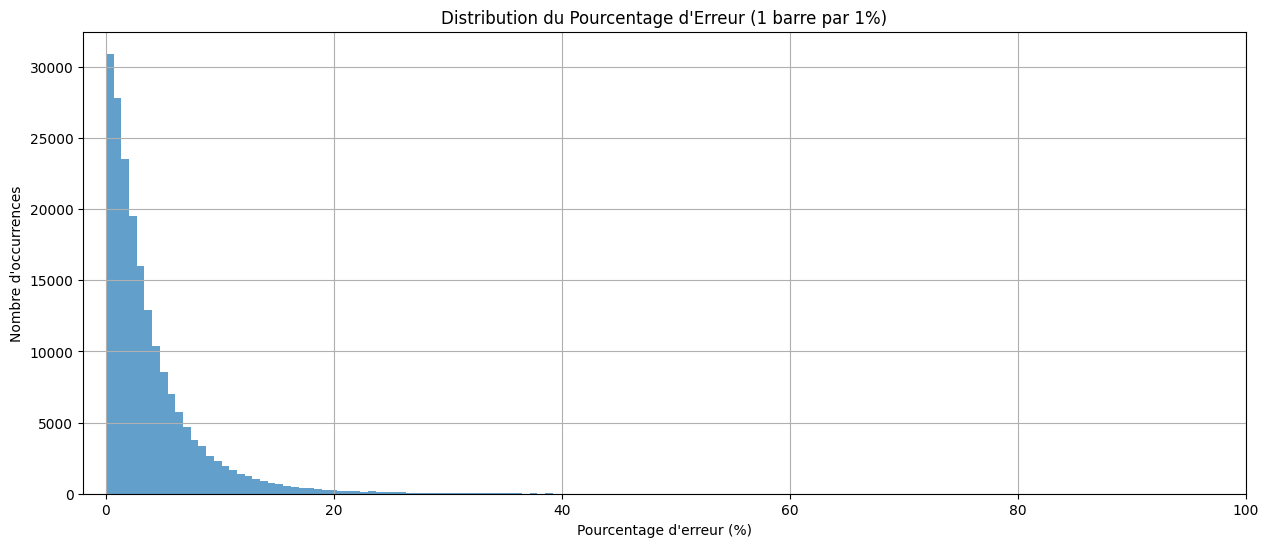

In [45]:
# Assuming you have already trained your model 'forest' and have the test set 'X_test'
y_pred = forest.predict(X_test)  # get the predictions for the test set

import matplotlib.pyplot as plt
import numpy as np

# Assuming forest.predict(X_test) has been executed and y_pred contains the predictions
# Let's create dummy data for y_pred as an example
y_pred = np.random.normal(loc=y_test, scale=100, size=len(y_test))  # Dummy predictions
y_test_adjusted = y_test  +1e-6

# Calculate the percentage error
percentage_error = np.abs(y_pred - y_test_adjusted) / y_test_adjusted * 100

# Prepare data for plotting
plot_data = {
    "Prix_m": percentage_error,
    "Percentage_Error": percentage_error
}

# Filtre pour limiter le pourcentage d'erreur entre 0% et 500%
filtre = (percentage_error >= 0) & (percentage_error <= 100)
percentage_error_filtre = percentage_error[filtre]

# Tracer l'histogramme avec un bar pour chaque pourcentage
plt.figure(figsize=(15, 6))  # Ajustez la taille pour mieux voir les détails
plt.hist(percentage_error_filtre, bins=100, alpha=0.7)  # 500 bins pour 0% à 500%
plt.title("Distribution du Pourcentage d'Erreur (1 barre par 1%)")
plt.xlabel("Pourcentage d'erreur (%)")
plt.ylabel("Nombre d'occurrences")
plt.xlim(-2, 100)  # Limiter l'axe des x à 0-500%
plt.grid(True)
plt.show()

In [46]:
# Ajouter une petite constante à y_test pour éviter la division par zéro
y_test_adjusted = y_test  +1e-6

# Calculer le pourcentage d'erreur
percentage_error_adjusted = np.abs(y_pred - y_test_adjusted) / y_test_adjusted * 100

# Calcul de l'erreur moyenne et médiane
mean_error_adjusted = np.mean(percentage_error_adjusted)
median_error_adjusted = np.median(percentage_error_adjusted)

print("Erreur moyenne en pourcentage (avec ajustement) :", mean_error_adjusted)
print("Erreur médiane en pourcentage (avec ajustement) :", median_error_adjusted)

Erreur moyenne en pourcentage (avec ajustement) : 3.865939653595114
Erreur médiane en pourcentage (avec ajustement) : 2.5211401738146235


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédire les valeurs sur l'ensemble de test
y_pred = forest.predict(X_test)  # Assurez-vous que forest et X_test sont définis

y_test_adjusted = y_test  +1e-6
# Calculer les métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print("Mean Squared Error (MSE):", mse) # proche de 
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 986500.2859008024
Mean Absolute Error (MAE): 657.7973459154521
R^2 Score: 0.7624714797469017


In [48]:
# Ajout d'une petite constante à y_test pour éviter la division par zéro
y_test_adjusted = y_test + 1e-6

# Calcul du pourcentage d'erreur
percentage_error = np.abs(y_pred - y_test_adjusted) / y_test_adjusted * 100

# Trouver les indices où le pourcentage d'erreur est supérieur à 200%
indices_error_above_200 = np.where(percentage_error > 200)[0]

# Sélectionner les X_test correspondant à ces indices
X_test_error_above_200 = X_test[indices_error_above_200]

X_test_error_above_200_df = pd.DataFrame(X_test_error_above_200)
